This is the base code that transforms one random polygon with n vertices in an another random polygon with the same number of vertices.
\
There are 3 main functions:
\
function generate_subspaces(n) => generate the random subspaces that represent the triangles\
function cs_decomposition(n,E,F,E1,E2,F1,F2) => makes a cs decomposition on the two subspaces generated\
function draw(M, n) => converts the input matrix (the base) into points on the graph that represent the triangle



In [107]:
using LinearAlgebra
using Plots

In [108]:
function generate_subspaces(n)
    E,=qr(randn(n,n))
    E1=E[:,1:2]
    E2=E[:,3:end]
    F,=qr(randn(n,n))
    F1=F[:,1:2]
    F2=F[:,3:end]
    return E,F,E1,E2,F1,F2
end

generate_subspaces (generic function with 1 method)

In [109]:
function cs_decomposition(n,E,F,E1,E2,F1,F2)
    U1,S11,V1=svd(E1'*F1,full=true)
    temp,S12,V2=svd(E1'*F2,full=true)
    U2,S22,V2=svd(E2'*F2,full=true)
    D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
    U2'*E2'*F1*V1 U2'*E2'*F2*V2]
    U=[U1 zeros(2,n-2)
    zeros(n-2,2) U2]
    W=E*U*D*U'*E'
    return W, U, U1, U2, V1, V2, D
end

cs_decomposition (generic function with 1 method)

In [110]:
function get_D_angle(D,n)
    angle= rad2deg(acos(D[n,n]))
    return angle
  end

get_D_angle (generic function with 1 method)

In [111]:
function draw(M, n)
    x = M[:, 1]
    y = M[:, 2]
    z = x + im * y
    e = z .^ 2
    E = [real(e)' ; imag(e)']
    
    points = zeros(2, n + 1)
    for i in 1:n
        points[:, i + 1] = sum(E[:, 1:i], dims=2)
    end
    
    return points
end

draw (generic function with 1 method)

In [112]:
n=3
E,F,E1,E2,F1,F2=generate_subspaces(n)

(LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([2.026436217644521 0.8909799341582793 -1.4033377569823204; -0.354508185559192 -1.2063899390870128 -0.7737915394689355; 0.8249468823703506 -0.3657885615704492 0.49607342505534424], [1.1072888653759116 1.2818369343882217 0.0; -3.350614060458093e258 1.763977559195684 0.0; 1.07947273140816e-309 -1.293398572621951e-178 0.0]), LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([0.857257311481341 -0.4863955020775381 0.033635807429520714; 0.39884030107046275 -0.23730664081408426 1.4195341287947465; 0.5805849637647649 -0.1355899793694464 -0.008351938308757079], [1.3367621407831345 -0.8403950169839719 0.0; 1.591384781e-314 1.9638945016684906 0.0; -4.778313017203516e-299 7.324654143354944e-306 0.0]), [-0.10728886537591165 -0.8892939678339108; 0.39254296655431087 -0.44871556823015; -0.9134544973752612 -0.0883774722546024], [-0.44457320897751934; 0.8028476556835891; 0.39722827646429726;;], [-0.3367621407831345

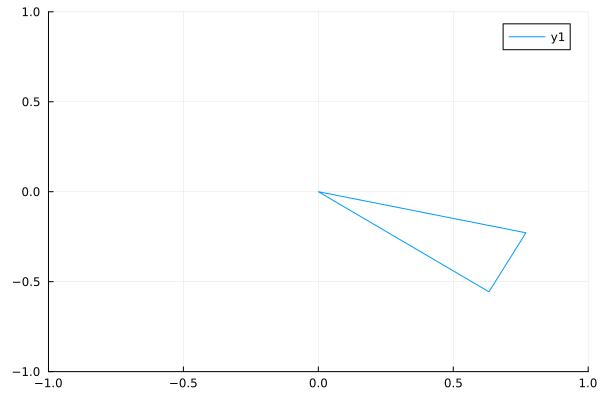

In [113]:
points=draw(E1*U1*V1',n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

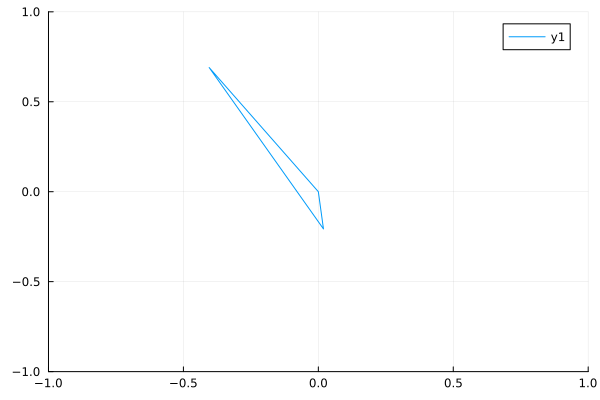

In [114]:
points=draw(F1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

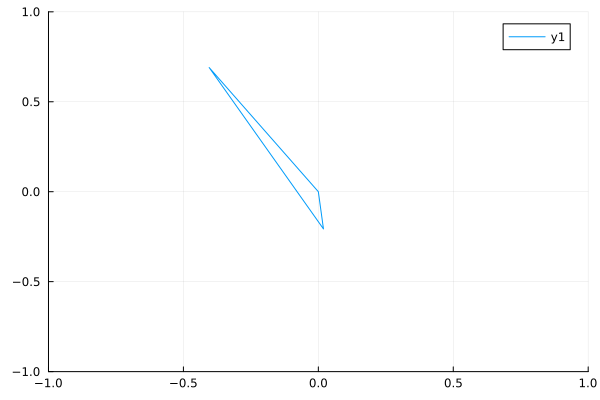

In [115]:
W, U, U1, U2, V1, V2, D=cs_decomposition(n,E,F,E1,E2,F1,F2)
points=draw(W*E1*U1*V1', n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

In [116]:
display(get_D_angle(D,n))
display(D)


59.86127778490278

3×3 Matrix{Float64}:
  1.0           5.55112e-17  2.21566e-17
  0.0           0.502095     0.864812
 -1.87711e-16  -0.864812     0.502095

[I   0   0\
 0   C   -S\
 0   S    C]

In [117]:

function smooth_transition()
    W, U, U1, U2, V1, V2, D = cs_decomposition(n, E, F, E1, E2, F1, F2)
    max_angle = get_D_angle(D, n)
    if(D[2,3]<0)
        i=1
    else
        i=-1
    end
    anim = @animate for angle in 0:1:max_angle
        D[2,2] = cosd(angle)
        D[2,3] = -i*sind(angle)
        D[3,2] = i*sind(angle)
        D[3,3] = cosd(angle)
        #display(D)
        W = E * U * D * U' * E'
        points = draw(W*E1*U1*V1' , n)
        plot(points[1, :], points[2, :], xlim = [-1, 1], ylim = [-1, 1], legend = true, label = "Angle: $angle")
    end
    gif(anim, "smooth_transition.gif", fps = 10) # Save the animation as a GIF
end

smooth_transition (generic function with 1 method)

┌ Info: Saved animation to d:\Docs matheus\UFRJ\IC\Códigos\CSD-Polygons\smooth_transition.gif
└ @ Plots C:\Users\mathe\.julia\packages\Plots\Pe7wF\src\animation.jl:156


Plots.AnimatedGif("d:\\Docs matheus\\UFRJ\\IC\\Códigos\\CSD-Polygons\\smooth_transition.gif")
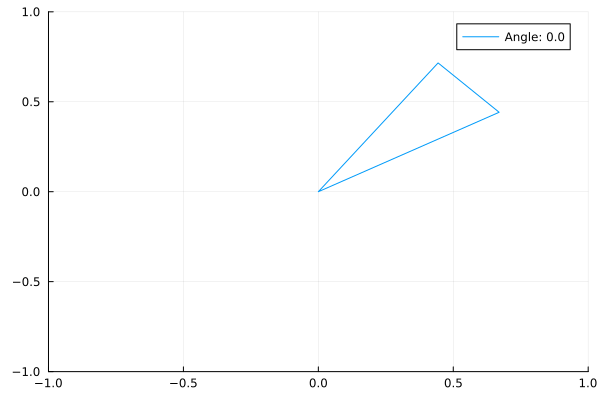

In [118]:
smooth_transition()

In [119]:
rad2deg(acos(0.5))
deg2rad(60)

1.0471975511965976